In [148]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
#load dataset
data_url_1 = "https://gist.githubusercontent.com/mbonsma/8da0990b71ba9a09f7de395574e54df1/raw/aec88b30af87fad8d45da7e774223f91dad09e88/lh_data.csv"

lefthanded_data = pd.read_csv(data_url_1)
lefthanded_data

,Age,Male,Female
0,10,12.717558,12.198041
1,11,15.318830,11.144804
2,12,14.808281,11.549240
3,13,13.793744,11.276442
4,14,15.156304,11.572906
...,...,...,...
72,82,7.350204,4.874899
73,83,6.471204,5.672536
74,84,6.510858,5.774881
75,85,7.337968,7.051459


Text(0, 0.5, 'Age')

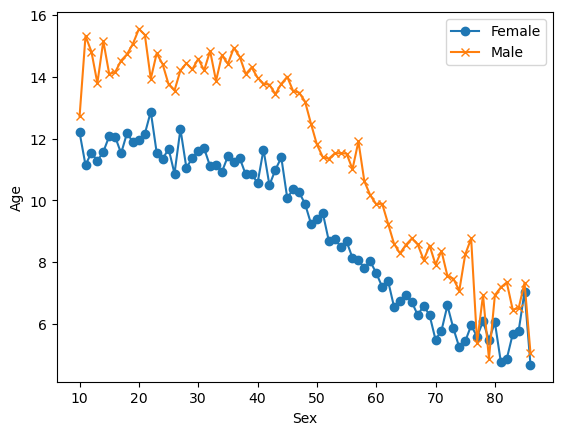

In [150]:
#Task1

fig, ax = plt.subplots()
ax.plot('Age', 'Female', data = lefthanded_data, marker = 'o')
ax.plot('Age', 'Male', data = lefthanded_data, marker = 'x')
ax.legend()
ax.set_xlabel('Sex')
ax.set_ylabel('Age')

Text(0, 0.5, 'Mean')

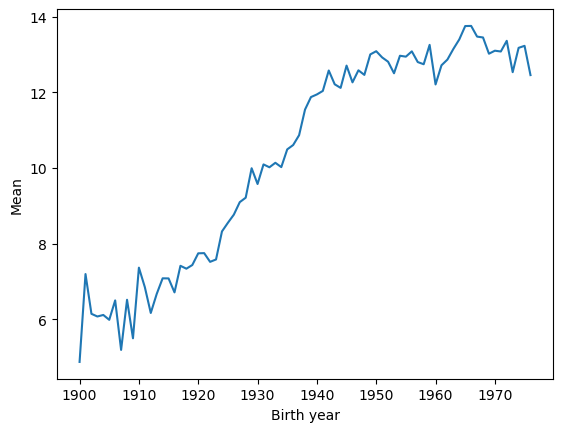

In [151]:
#TASK 2
#create column for birth year
lefthanded_data['Birth_year'] = 1986 - lefthanded_data['Age']

#create new column for mean of male and female
lefthanded_data['Mean_lh'] = lefthanded_data[['Male', 'Female']].mean(axis = 1)

#create plot for birth year vs mean
fig,ax = plt.subplots()
ax.plot('Birth_year', 'Mean_lh', data = lefthanded_data)
ax.set_xlabel('Birth year')
ax.set_ylabel('Mean')

In [152]:
#TASK 3

import numpy as np

def P_lh_given_A(ages_of_death, study_year = 1990):
    #last 10 data points
    early_1900_rate = lefthanded_data['Mean_lh'][-10:].mean()
    late_1900_rate = lefthanded_data['Mean_lh'][:10].mean()
    middle_rate = lefthanded_data.loc[lefthanded_data['Birth_year'].isin(study_year - ages_of_death)]['Mean_lh']
    youngest_age = study_year - 1986 + 10
    oldest_age = study_year - 1986 + 86
    
    P_return = np.zeros(ages_of_death.shape)
    P_return[ages_of_death > oldest_age] = early_1900_rate / 100
    P_return[ages_of_death < youngest_age] = late_1900_rate / 100
    P_return[np.logical_and((ages_of_death <= oldest_age), (ages_of_death >= youngest_age))] = middle_rate / 100
    
    return P_return

In [153]:
#TASK 4

data_url_2 = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"

death_distribution_data = pd.read_csv(data_url_2)
death_distribution_data

,Age\tBoth Sexes\tMale\tFemale
0,ALL\t2391399\t1175460\t1215939
1,0\t27937\t15646\t12291
2,1\t1989\t1103\t886
3,2\t1376\t797\t579
4,3\t1046\t601\t445
...,...
121,120\t1\t\t1
122,121\t\t\t
123,122\t\t\t
124,123\t\t\t


Text(0, 0.5, 'Both Sexes')

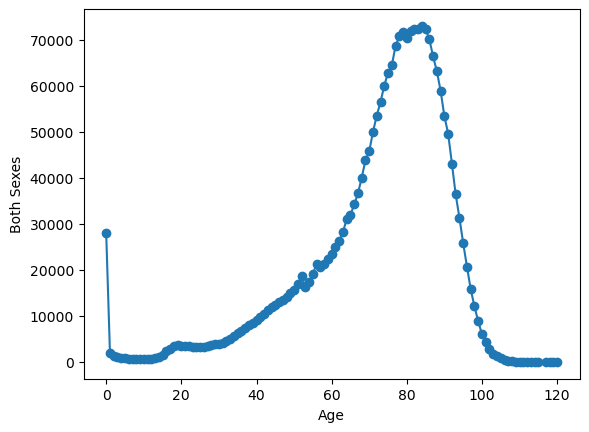

In [154]:
#seperating columns
death_distribution_data = pd.read_csv(data_url_2, sep = '\t', skiprows=[1])

#drop NaN for both sexes column
death_distribution_data = death_distribution_data.dropna(subset  = ['Both Sexes'])

#plot method
fig,ax = plt.subplots()
ax.plot('Age', 'Both Sexes', data = death_distribution_data, marker = 'o')

ax.set_xlabel("Age")
ax.set_ylabel("Both Sexes")

In [155]:
death_distribution_data

,Age,Both Sexes,Male,Female
0,0,27937.0,15646.0,12291.0
1,1,1989.0,1103.0,886.0
2,2,1376.0,797.0,579.0
3,3,1046.0,601.0,445.0
4,4,838.0,474.0,364.0
...,...,...,...,...
115,115,3.0,NaN,3.0
117,117,3.0,2.0,1.0
118,118,1.0,NaN,1.0
119,119,2.0,NaN,2.0


In [156]:
#TASK 5

def P_lh(death_distribution_data, study_year = 1990):
    #def P_lh_given_A(ages_of_death, study_year = 1990):
        P_list = death_distribution_data['Both Sexes'] * P_lh_given_A(death_distribution_data['Age'], study_year)

        P = np.sum(P_list)

        return P / np.sum(death_distribution_data['Both Sexes'])

print(P_lh(death_distribution_data))

0.07766387615350638


In [157]:
#TASK 6

def P_A_given_lh(ages_of_death, death_distribution_data, study_year = 1990):
    
    P_A = death_distribution_data['Both Sexes'][ages_of_death] / np.sum(death_distribution_data['Both Sexes'])
    P_left = P_lh(death_distribution_data, study_year) # use P_lh function to get probability of left-handedness overall
    P_lh_A = P_lh_given_A(ages_of_death, study_year) # use P_lh_given_A to get probability of left-handedness for a certain age
    return P_lh_A*P_A/P_left


In [158]:
#TASK 7

def P_A_given_rh(ages_of_death, death_distribution_data, study_year = 1990):
    
    P_A = death_distribution_data['Both Sexes'][ages_of_death] / np.sum(death_distribution_data['Both Sexes'])
    P_right = 1 - P_lh(death_distribution_data, study_year) # either you're left-handed or right-handed, so P_right = 1 - P_left
    P_rh_A = 1 - P_lh_given_A(ages_of_death, study_year) # P_rh_A = 1 - P_lh_A 
    return P_rh_A*P_A/P_right

Text(0, 0.5, 'Probability of being age A at death')

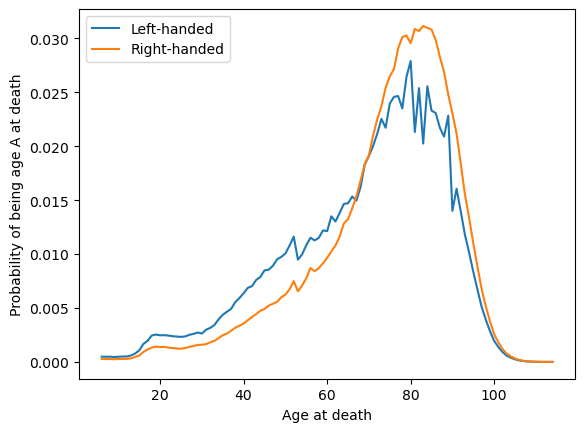

In [159]:
#TASK 8

ages = np.arange(6, 115, 1) # make a list of ages of death to plot
    
# calculate the probability of being left- or right-handed for each 
left_handed_probability = P_A_given_lh(ages, death_distribution_data)
right_handed_probability = P_A_given_rh(ages, death_distribution_data)

# create a plot of the two probabilities vs. age
fig, ax = plt.subplots() # create figure and axis objects
ax.plot(ages, left_handed_probability, label = "Left-handed")
ax.plot(ages, right_handed_probability, label = "Right-handed")
ax.legend() # add a legend
ax.set_xlabel("Age at death")
ax.set_ylabel("Probability of being age A at death")

In [160]:
#TASK 9

# calculate average ages for left-handed and right-handed groups
# use np.array so that two arrays can be multiplied
average_lh_age =  np.nansum(ages*np.array(left_handed_probability))
average_rh_age =  np.nansum(ages*np.array(right_handed_probability))

# print the average ages for each group
# ... YOUR CODE FOR TASK 9 ...
print("Average age of lefthanded is " + str(average_lh_age))
print("Average age of righthanded is  " + str(average_rh_age))

# print the difference between the average ages
print("The difference in average ages is " + str(round(average_rh_age - average_lh_age, 1)) + " years.")

Average age of lefthanded is 67.24503662801027
Average age of righthanded is  72.79171936526477
The difference in average ages is 5.5 years.


In [161]:
#TASK 10

# Calculate the probability of being left- or right-handed for all ages
left_handed_probability_2018 = P_A_given_lh(ages, death_distribution_data, 2018)
right_handed_probability_2018 = P_A_given_rh(ages, death_distribution_data, 2018)

# calculate average ages for left-handed and right-handed groups
average_lh_age_2018 = np.nansum(ages * np.array (left_handed_probability_2018))
average_rh_age_2018 = np.nansum(ages * np.array (right_handed_probability_2018))

print("The difference in average ages is " + 
    str(round(average_rh_age_2018 - average_lh_age_2018, 1)) + " years.")

The difference in average ages is 2.3 years.
